<a href="https://colab.research.google.com/github/toktok010/F550/blob/main/Solution_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_datareader
#purpose of this is to read financial data

In [2]:
import yfinance as yf
import pandas_datareader # Up-to-date remote data access for pandas
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
display("Practice exercise two")

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


'Practice exercise two'

In [3]:
display("Question 1: Download and plot US auto and housing sales since 1990")

'Question 1: Download and plot US auto and housing sales since 1990'

In [14]:
# Download financial data
data = yf.download('^GSPC', '1990-01-01', interval = "1d") # Download S&P500 data
# take close only
data_sp_adj_close = pd.DataFrame(data["Close"])
data_sp_adj_close = data_sp_adj_close.rename(columns={"Close": "SP500"})
data_sp_adj_close.head(10)

[*********************100%%**********************]  1 of 1 completed


,SP500
Date,
1990-01-02,359.690002
1990-01-03,358.760010
1990-01-04,355.670013
1990-01-05,352.200012
1990-01-08,353.790009
1990-01-09,349.619995
1990-01-10,347.309998
1990-01-11,348.529999
1990-01-12,339.929993


In [15]:
start = datetime.datetime(1990, 1, 1)
start

datetime.datetime(1990, 1, 1, 0, 0)

In [19]:
# Download Economic data from Fred
start = datetime.datetime(1990, 1, 1)
data = pandas_datareader.fred.FredReader(['TOTALSA','HSN1F'], start = start)
df = data.read()
print('TOTALSA: Total Vehicle Sales. Last observation: Jan 2024')
print('HSN1F: New One Family Houses Sold. Last observation: Dec 2024')
# interpolate dates
df = df.reindex(pd.date_range(start=df.index.min(), end=df.index.max(),freq='1D'))
df.tail(20)

TOTALSA: Total Vehicle Sales. Last observation: Jan 2024
HSN1F: New One Family Houses Sold. Last observation: Dec 2024


,TOTALSA,HSN1F
2023-12-13,NaN,NaN
2023-12-14,NaN,NaN
2023-12-15,NaN,NaN
2023-12-16,NaN,NaN
2023-12-17,NaN,NaN
2023-12-18,NaN,NaN
2023-12-19,NaN,NaN
2023-12-20,NaN,NaN
2023-12-21,NaN,NaN
2023-12-22,NaN,NaN


In [20]:
data_sp_adj_close

,SP500
Date,
1990-01-02,359.690002
1990-01-03,358.760010
1990-01-04,355.670013
1990-01-05,352.200012
1990-01-08,353.790009
...,...
2024-02-12,5021.839844
2024-02-13,4953.169922
2024-02-14,5000.620117


In [21]:
# Merge the two dataset. this command works by keeping columns of the Left index and then the Right one gets matched. there are commands that enable right merge, union merge and intersection merge.
df = df.merge(data_sp_adj_close, left_index=True, right_index=True)
df.head()

,TOTALSA,HSN1F,SP500
1990-01-02,NaN,NaN,359.690002
1990-01-03,NaN,NaN,358.760010
1990-01-04,NaN,NaN,355.670013
1990-01-05,NaN,NaN,352.200012
1990-01-08,NaN,NaN,353.790009


In [22]:
# Take only end of month, but first carry forward information
df = df.fillna(method='ffill')
df["DATE"] = df.index.values
df = df[pd.to_datetime(df["DATE"]).dt.is_month_end]   # keep month
df.tail(20)

,TOTALSA,HSN1F,SP500,DATE
2021-11-30,13.553,772.0,4567.000000,2021-11-30
2021-12-31,13.244,830.0,4766.180176,2021-12-31
2022-01-31,13.244,830.0,4515.549805,2022-01-31
2022-02-28,14.109,773.0,4373.939941,2022-02-28
2022-03-31,14.049,707.0,4530.410156,2022-03-31
2022-05-31,14.486,611.0,4132.149902,2022-05-31
2022-06-30,13.748,563.0,3785.379883,2022-06-30
2022-08-31,14.010,638.0,3955.000000,2022-08-31
2022-09-30,14.191,567.0,3585.620117,2022-09-30
2022-10-31,14.191,567.0,3871.979980,2022-10-31


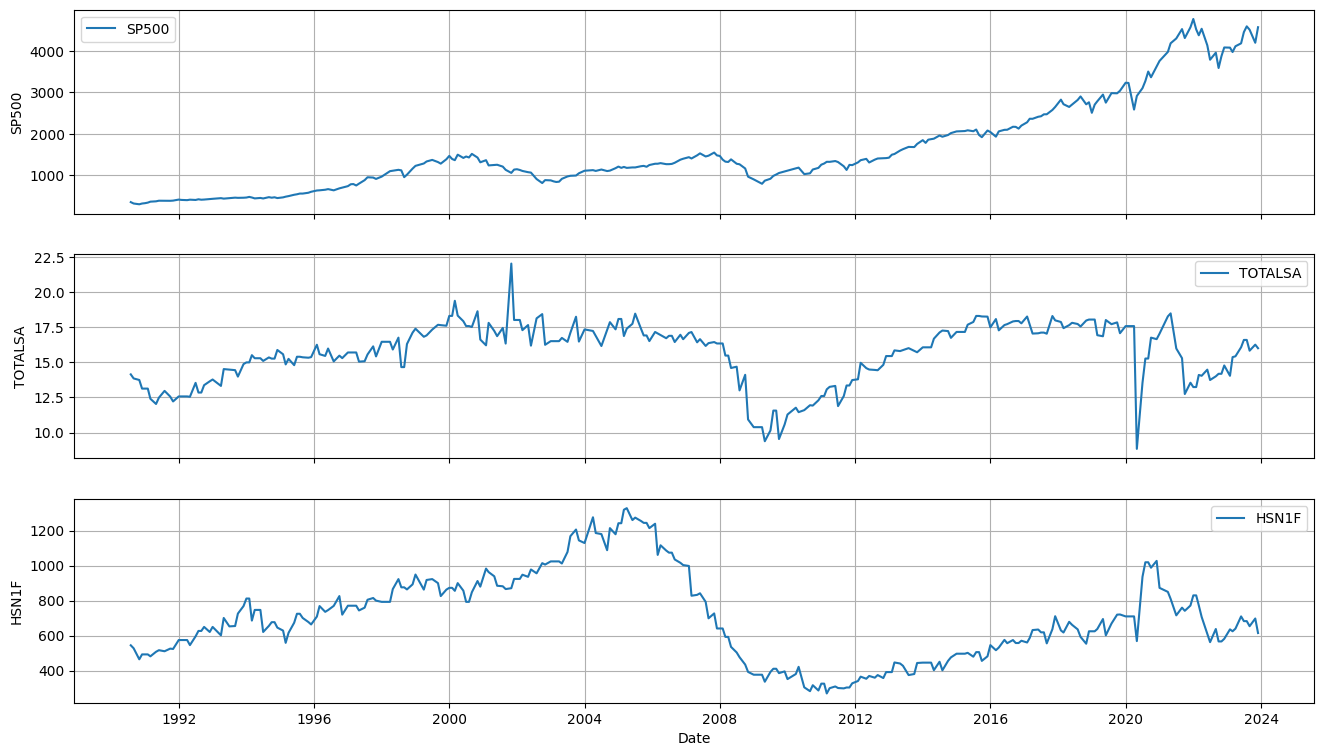

In [34]:
# Plot. subplot 3 indicates to Python to create 3 separate graphs, pretty nifty feature!
fig, ax = plt.subplots(3, sharex=True, sharey=False,figsize=(16,9))
ax[0].plot(df["SP500"], label = "SP500")
ax[0].set_ylabel('SP500')
ax[0].legend()
ax[0].grid()
ax[1].plot(df["TOTALSA"], label = "TOTALSA")
ax[1].set_ylabel('TOTALSA')
ax[1].legend()
ax[1].grid()
ax[2].plot(df["HSN1F"], label = "HSN1F")
ax[2].set_xlabel('Date')
ax[2].set_ylabel('HSN1F')
ax[2].legend()
ax[2].grid()

In [36]:
display("Question 2: What transformations should we perform on the data? Why? A: the relevant transformation is to convert everything to log prices" )

'Question 2: What transformations should we perform on the data? Why? A: the relevant transformation is to convert everything to log prices'

In [37]:
# Compute Log returns
df['SP500_log_chg'] = np.log(df["SP500"]) - np.log(df["SP500"].shift(1))
df['TOTALSA_log_chg'] = np.log(df["TOTALSA"]) - np.log(df["TOTALSA"].shift(1))
df['HSN1F_log_chg'] = np.log(df["HSN1F"]) - np.log(df["HSN1F"].shift(1))

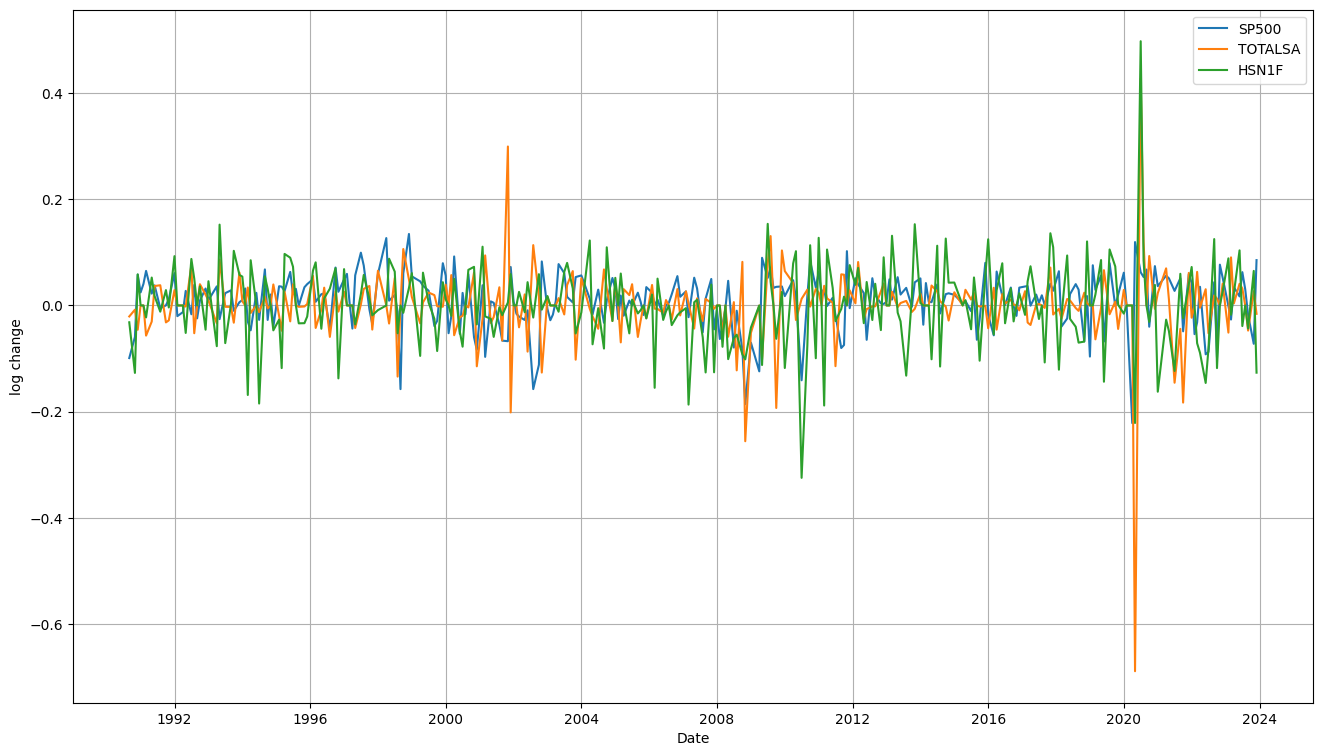

In [38]:
# Chart
# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df["SP500_log_chg"], label = "SP500")
ax.plot(df["TOTALSA_log_chg"], label = "TOTALSA")
ax.plot(df["HSN1F_log_chg"], label = "HSN1F")
ax.set_xlabel('Date')
ax.set_ylabel('log change')
ax.legend()
ax.grid()

In [39]:
display("Question 3: What lags would we need to apply to test link with US stock market? Why?")

'Question 3: What lags would we need to apply to test link with US stock market? Why?'

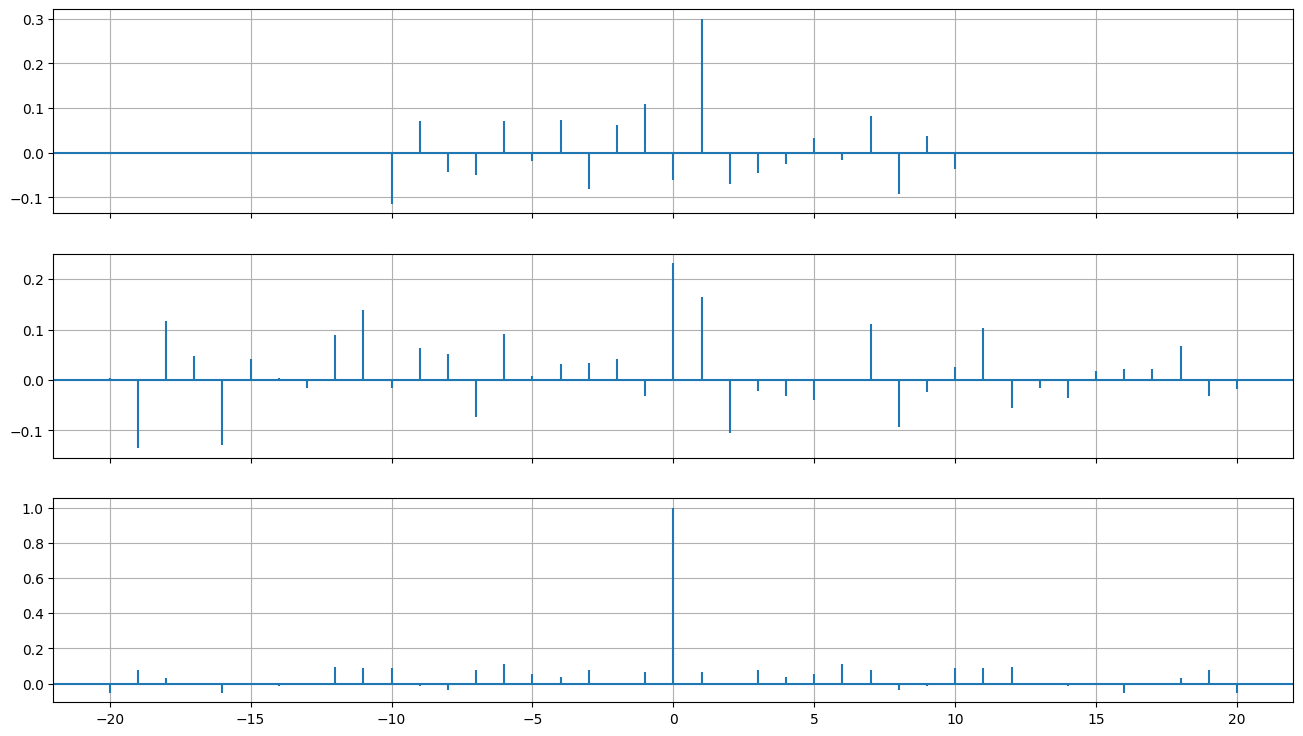

"hence past prices don't seem to give much predictability but public info such as vehicle sales and house sales show some predictive capability"

In [42]:
# Lead lag analysis without accounting for publication lag (1st input shifts on the x-axis)
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True, figsize=(16,9))
ax1.xcorr(df["TOTALSA_log_chg"][2:len(df)], df["SP500_log_chg"][2:len(df)], usevlines=True,  maxlags=10)  # cross autocorrelation Total Vehicle Sales has some small predictability over next months' returns
ax1.grid(True)
ax2.xcorr(df["HSN1F_log_chg"][2:len(df)], df["SP500_log_chg"][2:len(df)], usevlines=True, maxlags=20)  # cross autocorrelation house sales has some (smaller) predicatibility over next months' returns
ax2.grid(True)
ax3.acorr(df["SP500_log_chg"][2:len(df)], usevlines=True, normed=True, maxlags=20)  #  autocorrelation pure evidence. autocorrelation of the SP500 seems to be very small
ax3.grid(True)
plt.show()
display("hence past prices don't seem to give much predictability but public info such as vehicle sales and house sales show some predictive capability")

In [43]:
# Function to compute beta OLS
def Beta_OLS(y,X):
    return np.linalg.inv(np.matrix(X).T*np.matrix(X))*np.matrix(X).T*np.matrix(y).T

In [44]:
# Compute lagged values
df["SP500_log_chg_lag"] = df["SP500_log_chg"].shift(1)  # Compute lag 1 returns of SNP
df["HSN1F_log_chg_lag"] = df["HSN1F_log_chg"].shift(1)  # Compute lag 1 returns of HOUSING
df["TOTALSA_log_chg_lag"] = df["TOTALSA_log_chg"].shift(1)    # Compute lag 1 returns of Total Vehicle Sales
df["TOTALSA_log_chg_lag_lag"] = df["TOTALSA_log_chg_lag"].shift(1)    # Compute 2 lag returns of Total Vehicle Sales
# drop first missings
df = df[4:len(df)]
df.head()

,TOTALSA,HSN1F,SP500,DATE,SP500_log_chg,TOTALSA_log_chg,HSN1F_log_chg,SP500_log_chg_lag,HSN1F_log_chg_lag,TOTALSA_log_chg_lag,TOTALSA_log_chg_lag_lag
1990-12-31,13.134,493.0,330.220001,1990-12-31,0.024525,0.000000,0.000000,0.058207,0.058472,-0.045762,-0.007969
1991-01-31,13.134,493.0,343.929993,1991-01-31,0.040679,0.000000,0.000000,0.024525,0.000000,0.000000,-0.045762
1991-02-28,12.409,482.0,367.070007,1991-02-28,0.065114,-0.056782,-0.022565,0.040679,0.000000,0.000000,0.000000
1991-04-30,12.038,508.0,375.339996,1991-04-30,0.022280,-0.030354,0.052537,0.065114,-0.022565,-0.056782,0.000000
1991-05-31,12.487,517.0,389.829987,1991-05-31,0.037878,0.036620,0.017561,0.022280,0.052537,-0.030354,-0.056782


In [45]:
# prepare vars
dates = df.index.values
y_t = df["SP500_log_chg"].values
y_t_1 = df["SP500_log_chg_lag"].values
x1_t_1 = df["HSN1F_log_chg_lag"].values   # x1 --> Total Vehicle Sales
x2_t_1 = df["TOTALSA_log_chg_lag"].values  # x2 --> House Sales
x2_t_2 = df["TOTALSA_log_chg_lag_lag"].values

In [52]:
# Run the recursive out of sample exercise
start_oos = np.where(dates==np.datetime64(datetime.datetime(2006,1,31)))[0][0]
print(range(start_oos, len(dates)))  # 153 predictions based on continuous receipt of new data

# Set RHS + intercept
RHS = np.vstack((np.ones_like(y_t_1),y_t_1, x1_t_1, x2_t_1, x2_t_2)).T # INCLUDE INTERCEPT
RHS_ar = np.vstack((np.ones_like(y_t_1),y_t_1)).T    # Only AR(1) + intercept
predictions = list()
predictions_ar = list()
test = list()
for t in range(start_oos, len(dates)):
    # compute beta AR 1 model
    beta_ar = Beta_OLS(y_t[:t],RHS_ar[:t,:])
    # compute beta full model
    beta = Beta_OLS(y_t[:t],RHS[:t,:])
    y_hat_ar = [RHS_ar[t,:]*beta_ar][0][0,0]
    y_hat = [RHS[t,:]*beta][0][0,0]  # need to extract the value inside a matrix (of a matrix)
    true = y_t[t]
    predictions.append(y_hat)
    predictions_ar.append(y_hat_ar)
    test.append(true)
    #print('predicted=%f, predicted ar=%f, true=%f' % (y_hat, y_hat_ar, true))
error_ar = mean_squared_error(test, predictions_ar)  # Mean square error --> use true value (test) wrt the estimated one
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
print('Test MSE AR: %.5f' % error_ar)  # A larger MSE indicates that the data points are dispersed widely around its mean.

range(126, 279)
Test MSE: 0.00311
Test MSE AR: 0.00286


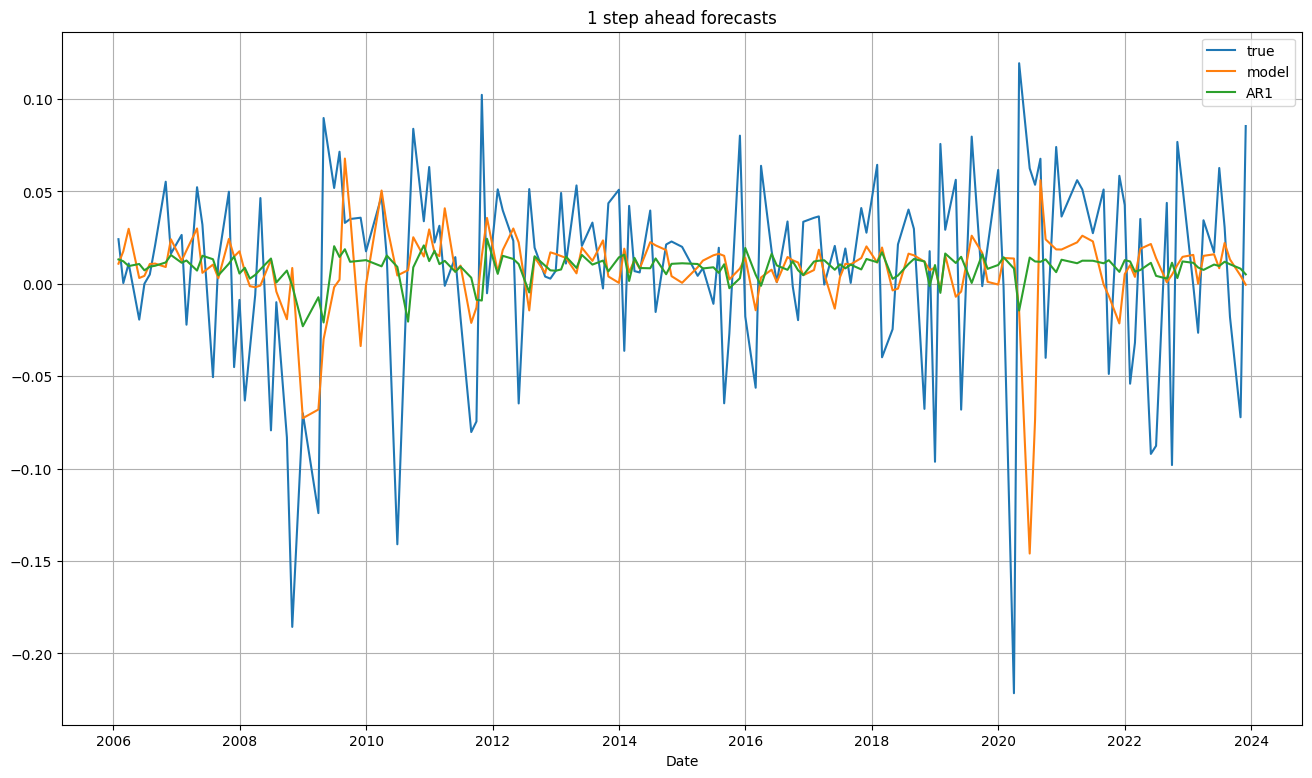

In [53]:
# collect 1 step ahead forecast in a df
df_pred = pd.DataFrame(list(zip(test, predictions, predictions_ar)),
               columns =['true', 'model','AR1']) # Create a dataframe with all data
df_pred['Time'] = dates[start_oos:]    # Convert to the right dates
df_pred = df_pred.set_index('Time')
# plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df_pred["true"], label = "true")
ax.plot(df_pred["model"], label = "model")
ax.plot(df_pred["AR1"], label = "AR1")
ax.set_xlabel('Date')
plt.title('1 step ahead forecasts')
ax.legend()
ax.grid()

the true S&P500 returns are in blue. we did regression predictability based on past prices which is given by AR(1) in green. the second predictive model is given by the orange one which uses past prices as well as past public info. the orange one is not a bad approximation but there could still be improvements. perhaps, this could be done through sentiment analysis.